In [1]:
# !chcp 1251
import warnings
warnings.simplefilter(action='ignore', category=Warning)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, ScalarFormatter
from matplotlib.patches import Rectangle
from matplotlib.gridspec import GridSpec

In [2]:
# Настройка рабочего стола и вывода инфы в пандас
from IPython.display import display, HTML
display(HTML("<style>.container { width:90% !important; }</style>"))
pd.options.display.max_columns = 25
pd.options.display.precision = 7
pd.options.display.max_colwidth = 50

## Загрузка данных МЭР, ригис, доп.инфы и коодинат кустов скважин и создание рабочих копий датасетов

In [3]:
mer_init = pd.read_csv('../all_mers/nng_mur_mer_20230519.csv', encoding = 'cp1251', sep = ';')

In [4]:
rigis_init = pd.read_csv('../all_mers/nng_mur_rigis_20230519.csv', encoding = 'cp1251', sep = ';')

In [5]:
addinfo_init = pd.read_csv('../all_mers/nng_mur_addinfo_20230519.csv', encoding = 'cp1251', sep = ';')

In [6]:
padcoord_init = pd.read_csv('../all_mers/nng_mur_padcoord_20230522.csv', encoding = 'cp1251', sep = ';')

In [7]:
geobd_ngt_init = pd.read_csv('../all_mers/nng_mur_geobd_ngt_20230522.csv', encoding = 'cp1251', sep = ';')

In [8]:
mer = mer_init.copy()
rigis = rigis_init.copy()
addinfo = addinfo_init.copy()
padcoord = padcoord_init.copy()
geobd_ngt = geobd_ngt_init.copy()

In [14]:
sugWells = ['1758', '1950','2067']
sug_1758 = mer[mer.oil_field.str.contains('Суг') & (mer.wellbore.isin(sugWells))]
sug_1758.date_ = pd.to_datetime(sug_1758.date_, dayfirst=True)
sug_1758['oil_tpd'] = (sug_1758.oil/sug_1758.worktime)*24
sug_1758['wat_tpd'] = (sug_1758.wat/sug_1758.worktime)*24
sug_1758['liq_tpd'] = (sug_1758.oil_tpd + sug_1758.wat_tpd)
sug_1758['wc'] = (sug_1758.wat_tpd/(sug_1758.oil_tpd + sug_1758.wat_tpd))*100

In [23]:
sug_1758_test = mer[mer.oil_field.str.contains('Суг') & (mer.wellbore.str.contains('1758'))]

In [24]:
sug_1758_test.wellbore.unique()

array(['1758'], dtype=object)

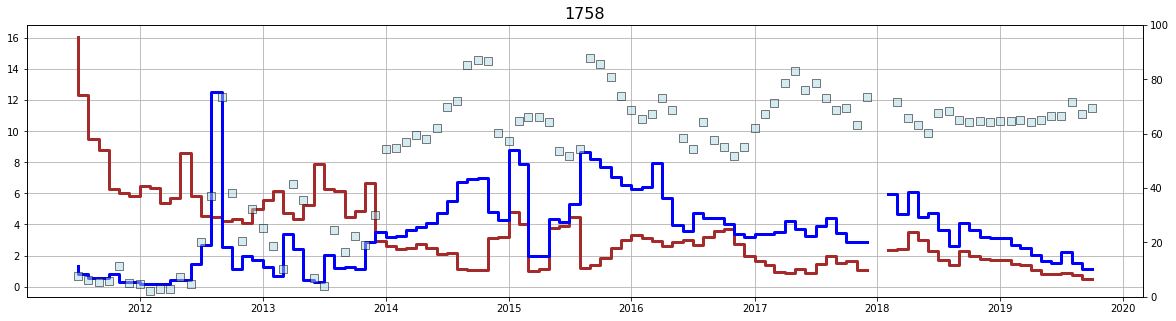

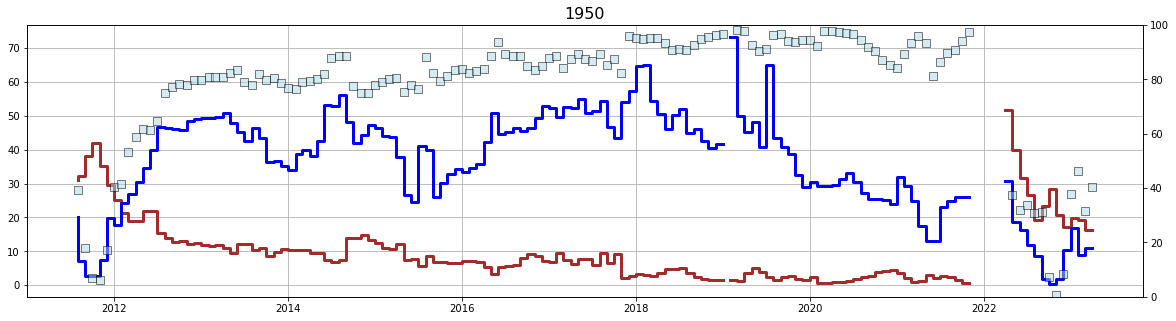

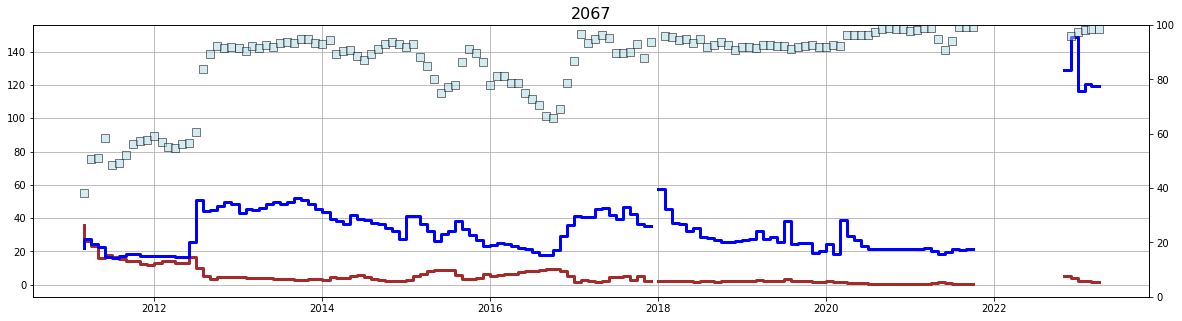

In [18]:
for mer_well in sug_1758.wellbore.unique():
    f, ax = plt.subplots(figsize=(20,5))
    oil = sug_1758[(sug_1758.wellbore == mer_well)].sort_values(by = ['date_'])['oil_tpd']
    wat = sug_1758[(sug_1758.wellbore == mer_well)].sort_values(by = ['date_'])['wat_tpd']
    wc = sug_1758[(sug_1758.wellbore == mer_well)].sort_values(by = ['date_'])['wc']
    period = sug_1758[(sug_1758.wellbore == mer_well)].sort_values(by = ['date_'])['date_']
    ax.step(period, oil, color='brown', lw=3)
    ax.step(period, wat, color='blue', lw=3)
    ax.set_title(mer_well, fontsize=16)
    ax.grid()
    ax2 = ax.twinx()
    ax2.scatter(period, wc, color='lightblue', ec='black', s=50, marker='s', alpha=0.5)
    ax2.set_ylim(0,100)

## Жутко геморная подготовка данных из Техлог к нормальному виду датафрейма

In [334]:
lqc_data_init = pd.read_csv('lqc_data.csv', sep=';')
lqc_data = lqc_data_init.copy()
lqc_data = lqc_data[lqc_data.ZONES=='БС10_TOP_S']
lqc_data = lqc_data[['wellName', 'DEPT', 'GR','RT_DP','RT_MD', 'RT_SH', 'TVDSS', 'ZONES']]
lqc_data = lqc_data[(lqc_data.GR !=-9999.00)]
lqc_data = lqc_data.convert_dtypes()
lqc_data.DEPT = lqc_data.DEPT.astype('float')
lqc_data.RT_DP = lqc_data.RT_DP.astype('float')
lqc_data.RT_MD = lqc_data.RT_MD.astype('float')
lqc_data.RT_SH = lqc_data.RT_SH.astype('float')
lqc_data.TVDSS = lqc_data.TVDSS.astype('float')
for var in lqc_data:
    if lqc_data[var].dtype == 'float64':
        lqc_data[var] = lqc_data[var].round(1)

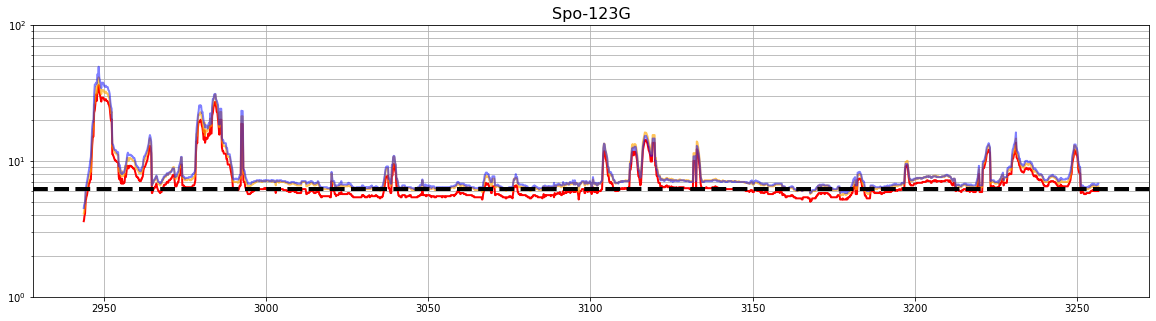

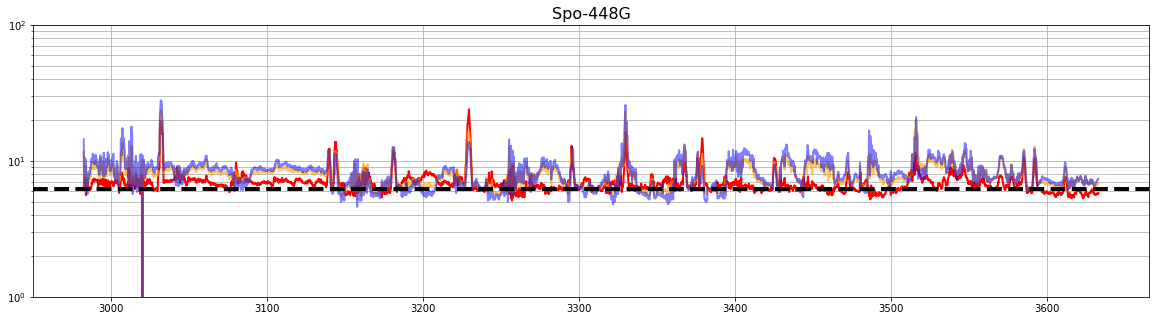

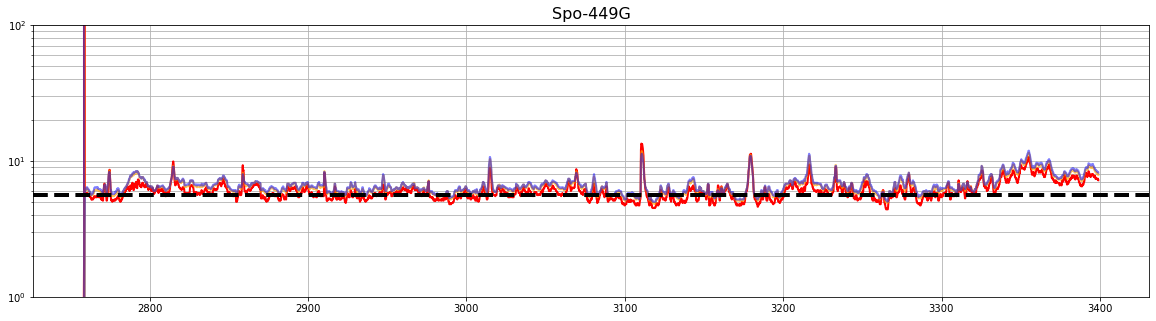

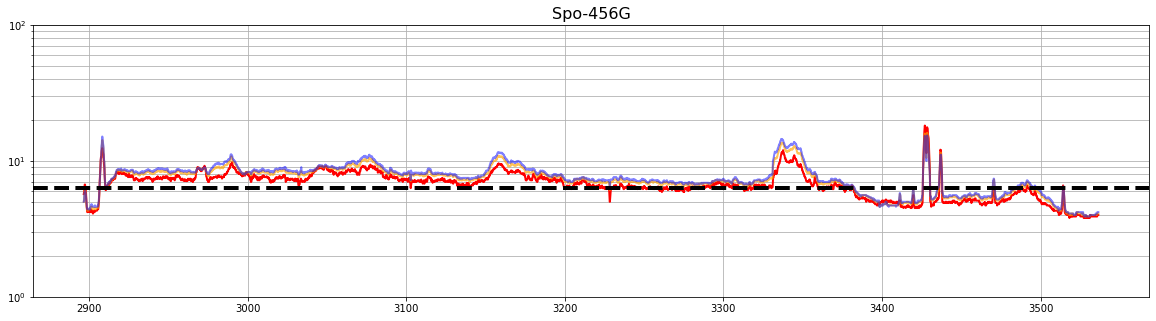

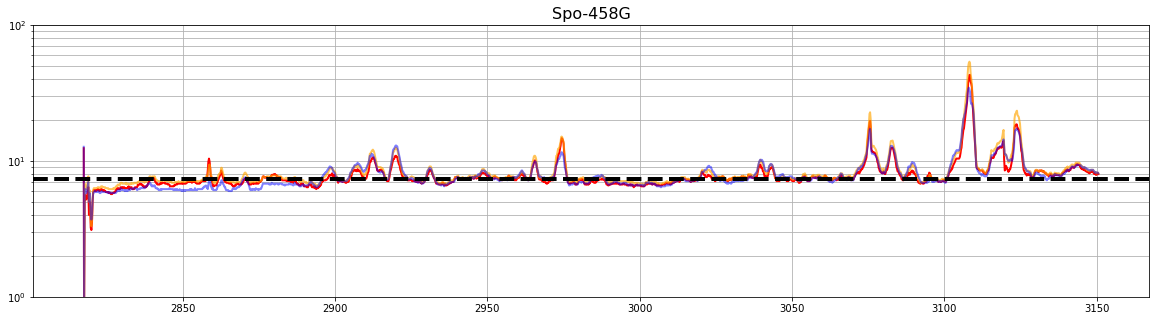

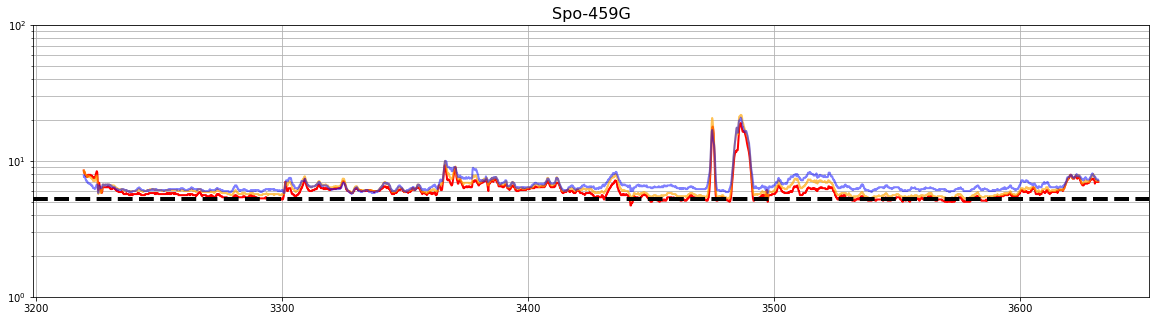

In [389]:
for gis_well in lqc_data.wellName.unique():
    f, ax = plt.subplots(figsize=(20,5))
    rtdp = lqc_data[(lqc_data.wellName == gis_well)]['RT_DP']
    rtmd = lqc_data[(lqc_data.wellName == gis_well)]['RT_MD']
    rtsh = lqc_data[(lqc_data.wellName == gis_well)]['RT_SH']
    md = lqc_data[(lqc_data.wellName == gis_well)]['DEPT']
    mode = lqc_data[(lqc_data.wellName == gis_well)]['RT_SH'].mode()[0]
    ax.plot(md, rtsh, color='red', lw=2)
    ax.plot(md, rtmd, color='orange', alpha=0.66, lw=2)
    ax.plot(md, rtdp, color='blue', alpha=0.5, lw=2)
    ax.axhline(y= mode, lw=4, color='black', linestyle = '--')
    ax.set_yscale('log')
    ax.set_ylim(1,100)
    ax.set_title(gis_well, fontsize=16)
    ax.grid(which='both')